# Probability and statistics fundamentals

Let's begin by importing the necessary modules.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis

### Histogram

A histogram is a representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable. 

Let's visualize some data about the sugar content of wine using a histogram:

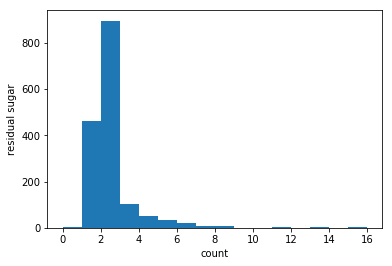

In [2]:
# read dataset
df = pd.read_csv('./data/winequality-red.csv',sep=';')

# create histogram
bin_edges = np.arange(0, df['residual sugar'].max() + 1, 1)
fig = plt.hist(df['residual sugar'], bins=bin_edges)

# add plot labels
plt.xlabel('count')
plt.ylabel('residual sugar')
plt.show()

### Scatterplot
A scatter plot is used to display the relationship for two variables in a set of data.

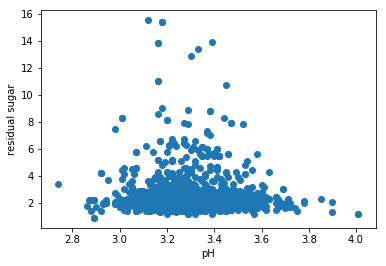

In [3]:
# create scatterplot
fig = plt.scatter(df['pH'], df['residual sugar'])

# add plot labels
plt.xlabel('pH')
plt.ylabel('residual sugar')
plt.show()

### Box plots
A box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. A quartile is a type of quantile. The first quartile (Q1) is defined as the middle number between the smallest number and the median of the data (bottom of the vertical rectangle in the figure below) set. The second quartile (Q2) is the median of the data (horizontal red line in the figure below). The third quartile (Q3) is the middle value between the median and the highest value of the data set (top of the vertical rectangle in the figure below). Box plots may also have lines extending vertically from the boxes indicating variability outside the upper and lower quartiles and circles/dots indicating outliers in the data.

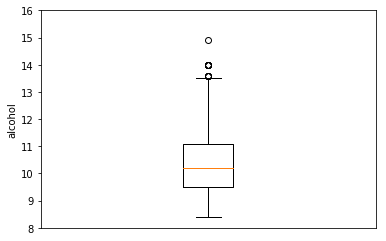

In [4]:
plt.boxplot(df['alcohol'])

plt.ylim([8, 16])
plt.ylabel('alcohol')

fig = plt.gca()
fig.axes.get_xaxis().set_ticks([])
plt.show()

# Basic statistics

We can use `numpy` to generate a random number from a uniform distribution between 0 and 10. If you evaluate the cell below several times (press `Shift-Enter` or press on the triangular `Run Cell` button in the toolbar above), it will generate a different random number each time.

In [5]:
np.random.uniform(0, 10)

8.18443078865285

We can generate an **array** of random numbers by passing a third argument to the `np.random.uniform` function, saying how many random numbers we want. We store the array in a *variable* named `observations`.

In [6]:
observations = np.random.uniform(0, 10, 10000)
print(observations)

[1.10825221 9.59620859 4.42481433 ... 5.42164686 5.29882969 0.05885041]


Let's plot a histogram of the data we have generated:

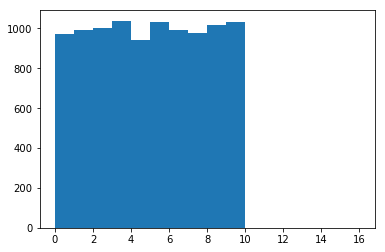

In [7]:
fig = plt.hist(observations, bins=bin_edges)

We can also draw random numbers from a normal distribution. 

In [8]:
observations = np.random.normal(10, 2, 500) #Draw 500 random numbers from a normal distribution with mean 10 and standard deviation 2

Let's plot a histogram of the data we have generated:

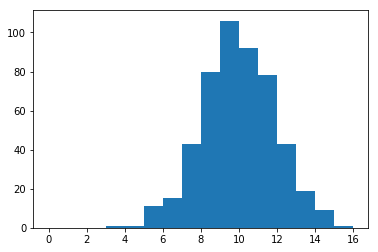

In [9]:
fig = plt.hist(observations, bins=bin_edges)

The array object has descriptive statistic *methods* that provide descriptive summaries of the values contained within:

#### Mean
The sum of the data values divided by the number of values:
$$\bar{x} = \frac{1}{n}\sum_{i=1}^n = x_i$$

In [13]:
mean=np.mean(observations)
mean

9.999515359646196

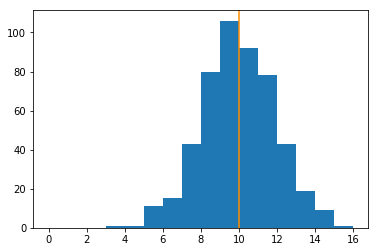

In [14]:
fig = plt.hist(observations, bins=bin_edges)
plt.axvline(mean, color='darkorange')
plt.show()

#### Median
The median is the value separating the higher half from the lower half of a data sample. For a data set, it may be thought of as the "middle" value.

In [15]:
np.median(observations)

9.947538377763337

#### Variance 
Variance is the expectation of the squared deviation of a random variable from its mean. Informally, it measures how far a set of (random) numbers are spread out from their average value. 

$$Var_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

In [16]:
np.var(observations) #Variance: (Standard deviation)^2

3.777940592030456

#### Standard deviation
The square root of the variance also quantifies the spread of a distribution but in the same units as the original measurement.

$\sigma_x=\sqrt{Var_x}$

In [17]:
sd=np.std(observations) #Standard deviation (Square root of variance)
sd

1.943692514784799

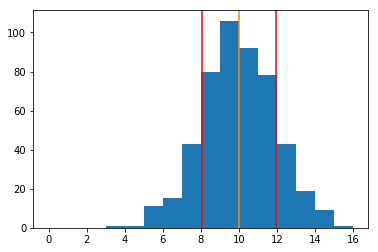

In [18]:
fig = plt.hist(observations, bins=bin_edges)
plt.axvline(mean, color='darkorange')
plt.axvline(mean-sd, color='red')
plt.axvline(mean+sd, color='red')
plt.show()

#### Sum of Elements in Array, Minimum, Maximum

In [19]:
np.sum(observations) #Sum all the values in the array

4999.757679823098

In [20]:
np.min(observations) #Minimum

3.6702079875253446

In [21]:
np.max(observations) #Maximum

16.541963019476366

In [22]:
import scipy.stats
scipy.stats.describe(observations) #Printing a bunch of descriptive statistics simultaneously

DescribeResult(nobs=500, minmax=(3.6702079875253446, 16.541963019476366), mean=9.999515359646196, variance=3.785511615260978, skewness=-0.03375986264082907, kurtosis=0.09409171651307657)

## Coins and dice

Let's simulate the throwing of a six sided die by a random choice between the numbers 1 and 6 and drawing our samples from the **uniform distribution** (equal probability of getting 1,2,3,4,5 or 6, i.e.  $\frac{1}{6}$ ).


![](./images/uniform-dist.jpg)

In [23]:
np.random.randint(1,7)

6

Let's throw the die **twice**, which gives as an array with the result of the first and second throw.

In [24]:
np.random.randint(1, 7, 2)

array([4, 1])

The average value of throwing the die twice is simply the mean (average) of the value of each throw.

In [25]:
np.random.randint(1, 7, 2).mean()

5.0

Let's simulate the average value of throwing a die twice if we repeat the experiment 1000 times and plot the resulting Probability Mass Function.

In [26]:
N = 1000
mean = np.zeros(N, dtype=int)
for i in range(N):
    mean[i] = np.random.randint(1, 7, 2).mean()
np.set_printoptions(threshold=20) #Limit printing out long arrays    
print(mean)

[3 3 5 ... 1 2 5]


Let's count how many times we have an average value of the 2 throws equal to 1, 2, 3, 4, 5 or 6 in our 1000 simulations:

In [27]:
import scipy.stats
values,counts=np.unique(mean,return_counts=True)
for i,c in zip(values,counts):
    print(i,c)

1 85
2 208
3 321
4 226
5 124
6 36


Let's plot that Probability Mass Function

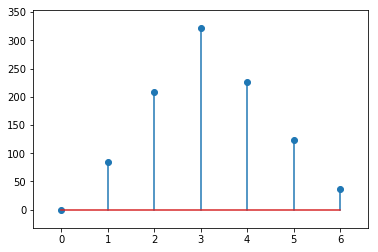

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.stem(np.bincount(mean))
plt.margins(0.1)

Observe how even though throwing a die is characterized by the **uniform distribution** (equal probability of getting 1,2,3,4,5 or 6, i.e. $\frac{1}{6}$) when we take a sample of size 2 (throwing the die twice) and measure the average value of both die throws, the resulting probably distribution is normal. This phenomena is named the **central limit theorem** in statistics and is one of the most important emergent properties of the natural world since it allows scientists to easily study phenomena emerging from summatory processes (which are quite common) using the normal (Gaussian) distribution.

### Central limit theorem

The central limit theorem states that the mean of a set of random measurements will tend to a normal distribution, no matter the shape of the original measurement distribution. The property is also true of the sum of a set of random measurements. Let's test that again in Python, simulating 500 measurements from a uniform distribution between 0 and 10. 

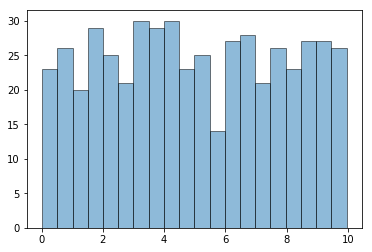

In [31]:
sim = np.random.uniform(0, 10, 500)
plt.hist(sim, bins=20, alpha=0.5, edgecolor = "black");

Notice that if we increase the number of simulations from 500 to 10,000, The randomly generated data approaches the uniform distribution more clearly.

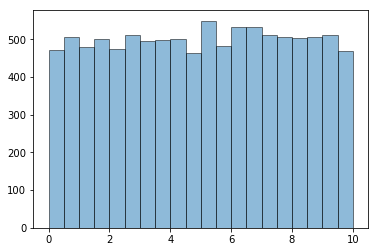

In [32]:
sim = np.random.uniform(0, 10, 10000)
plt.hist(sim, bins=20, alpha=0.5, edgecolor = "black");

However, if we sample 500 measurements from the uniform distribution between 0 and 10 and calculate their mean and repeat this procedure 10000 times and plot a histogram of the means, we should get a frequency histogram which is normally distributed.

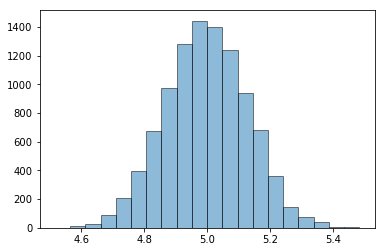

In [33]:
N = 10000
sim = np.zeros(N)
for i in range(N):
    sim[i] = np.random.uniform(0,10, 500).mean()
plt.hist(sim, bins=20, alpha=0.5, edgecolor = "black");

### The law of large numbers

The expected value of a die roll ( the average value of throwing a dice many times) is:

$$ \sum_{i=1}^6i \times \frac{1}{6}=3.5$$

That means that if we toss a dice a large number of times, the mean value should converge to 3.5 over time. Let's confirm that by running a simulation in Python.


(0, 6)

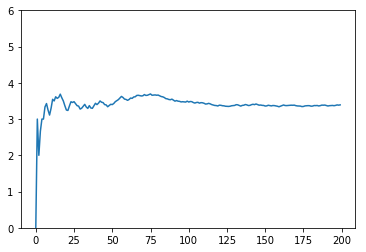

In [34]:
N = 200
roll = np.zeros(N, dtype=int)
expectation = np.zeros(N)
for i in range(N):
    roll[i] = np.random.randint(1, 7)
for i in range(1, N):
    expectation[i] = np.mean(roll[0:i])
plt.plot(expectation);
plt.ylim([0,6])

### Covariance and Correlation

Let's load the iris data set about flower types containing flower features such as sepal/petal length/width: 

In [35]:
# read dataset
df = pd.read_csv('./data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's create scatterplots of every feature in the data set against itself and against every other feature as well as density estimations of each feature:

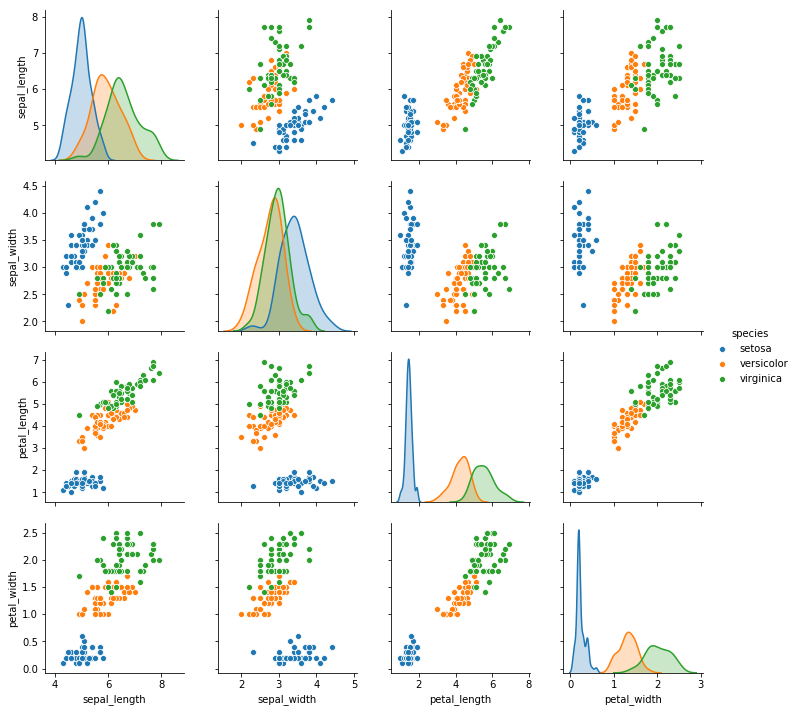

In [36]:
# create scatterplot matrix
fig = sns.pairplot(data=df,hue='species')

plt.show()

Covariance is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive. In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative.  The sign of the covariance therefore shows the tendency in the linear relationship between the variables. When there is no consistent relationship between the variables across the data set, the covariance is around 0. The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. The normalized version of the covariance is the correlation coefficient, which shows by its magnitude the strength of the linear relation.

The formula for calculating the covariance is:

$$\sigma_{x,y} = \frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$

- note that similar to variance, the dimension of the covariance is $unit^2$
- covariance can be understood as the "variability due to codependence" whereas the variance is the "independent variability"

Covariance matrix for the 4-feature dataset:

$$
\Sigma = \begin{bmatrix}
    \sigma_{1}^2  & \sigma_{1,2} & \sigma_{1,3} & \sigma_{1,4} \\
    \sigma_{2,1}  & \sigma_{2}^2 & \sigma_{2,3} & \sigma_{2,4} \\
    \sigma_{3,1}  & \sigma_{3,2} & \sigma_{3}^2 & \sigma_{4,3} \\
    \sigma_{4,1}  & \sigma_{4,2} & \sigma_{4,3} & \sigma_{4}^2
\end{bmatrix}
$$

- Notice the variance along the diagonal
- Remember, the sample variance is computed as follows:

$$\sigma^2_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

The covariance matrix for the 4-feature iris data set is:

In [37]:
X = df[df.columns[:-1]].values
X.shape

(150, 4)

In [38]:
np.cov(X.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

The pearson **correlation** is a "dimensionless" version of the covariance, achieved by dividing by the standard deviation

$$\rho_{x, y} = \frac{\sigma_{x,y}}{\sigma_x \sigma_y}
$$
- Measures degree of a linear relationship between variables, assuming the variables follow a normal distribution
- $\rho=1$: perfect positive correlation
- $\rho=-1$: perfect negative correlation
- $\rho=0$: no correlation

In [39]:
np.corrcoef(X.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

Look for example at the correlation between `petal_width` and `petal_length` (row 3, column 4 OR row4, column 3 of the matrix above). 0.96 is a very high correlation value. Look at the plot above and visually confirm the existence of this positive correlation between the 2 features `petal_width` and `petal_length`. 

### Gaussian distribution

Consider 2 populations (blue and red) described by Gaussian (normal) distributions. Both populations have the same mean, 5, of whatever trait we are measuring (could be height, weight, income, anxiety, etc). However, each population has a slightly different standard deviation. The red population has a slightly larger spread (1.3) than the blue population (1.1). That is, members of the red population will tend to be overrepresented at the tails (extreme values) of the trait. Let's visualize this phenomena:

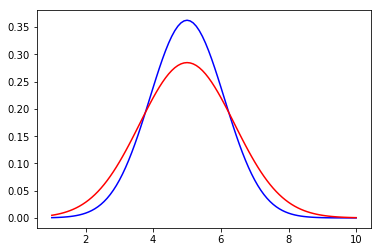

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
bluePopulation = scipy.stats.norm(5, 1.1)
redPopulation = scipy.stats.norm(5, 1.4)
x = np.linspace(1, 10, 100)

plt.plot(x, bluePopulation.pdf(x), color='blue');
plt.plot(x, redPopulation.pdf(x), color='red');

If we look at an extreme value of the trait, for instance 8, what are the odds of finding a member of the red population rather than a member of the blue population at that quantity? To calculate that, we simply estimate the probability of that value for each distribution:  

In [41]:
print(bluePopulation.pdf(8))
print(redPopulation.pdf(8))

0.008797770186781824
0.02868648602921652


And then we take the ratio of the 2 probabilities:

In [42]:
redPopulation.pdf(8)/bluePopulation.pdf(8)

3.2606541680659515

That is, there will be slightly more than 3 members of the red population for every member of the blue population at the trait value of 8.

### Cumulative distribution function

One last example, let's describe an imaginary country where the average household income is $60,000$ dollars (with a standard Deviation of $20,000$

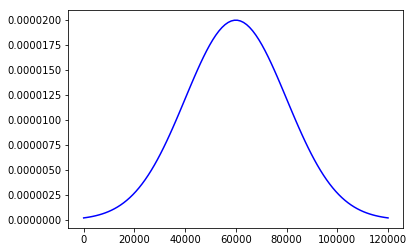

In [43]:
meanIncome=60000
standardDeviationIncome=20000
income = scipy.stats.norm(meanIncome,standardDeviationIncome)
x = np.linspace(1, 120000, 100)
plt.plot(x, income.pdf(x), color='blue');

What percentage of households on that country have an income less than $80,000 per year? The answer is easy if we use the cumulative distribution function

<img src="./images/cdf.png" alt="Drawing" style="width: 300px;"/>

The percentage of the population making less than $80,000$ a year is the area under the normal curve up to the $80,000$ mark. We can get the specific quantity of that area using the cumulative distribution function, which tracks the percentage of the population below a certain threshold on the x-coordinate.

In [44]:
income.cdf(80000) #cdf for cumulative distribution function

0.8413447460685429

That is, 84% of households in that country had an income a year below $80,000. 

What percentage of the households make more than $100,000$ per year? The answer is the area under the curve above the $100,000$ threshold. Since the total area under the normal curve is 1, we can use the concept of the complement probability to determine the specific amount. The area above the threshold will be equal to 1 minus the area below the threshold. Thus:

In [45]:
1-income.cdf(100000)

0.02275013194817921

Slightly more than 2% of the households make more than $100,000$ a year

What percentage of households have an income between $40,000$ and $80,000$ per year?

In [46]:
income.cdf(80000)-income.cdf(40000)

0.6826894921370859

68% of the households have an income between $40,000$ and $80,000$ per year.